<a href="https://colab.research.google.com/github/Harshavalmiki/256_Adv_Data_Mining/blob/main/Adv_Data_mining_clustering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data:
**Variables**:
PTIndex (Popular Times Index): This variable represents the hours of the day, ranging from 1 (6am-7am) to 11 (8pm-9pm).
HBIndex (Hot Beverages Index): This variable categorizes hot beverages, ranging from 1 (Coffee type 1) to 9 (Coffee Of the Day).
**Approach:**
Data Visualization: Prior to applying clustering techniques, it's essential to create a visual representation of the data. To achieve this, we will generate a scatter plot that juxtaposes PTIndex against HBIndex, allowing us to identify any observable clusters.

**Feature Scaling:** Clustering algorithms, such as KMeans, can be sensitive to variations in data scale. While PTIndex and HBIndex have similar scales, implementing feature scaling is considered a good practice to ensure consistent results.

**Choosing a Clustering Algorithm:** For this dataset, we will employ the KMeans clustering algorithm due to its simplicity and effectiveness for this type of problem. To determine the optimal number of clusters, we will employ the Elbow method, aiming for a maximum of three clusters.

**Cluster Interpretation**: After successfully identifying the clusters, our next step is to interpret each cluster. This interpretation will guide us in deciding when and for which beverage we should offer coupons.








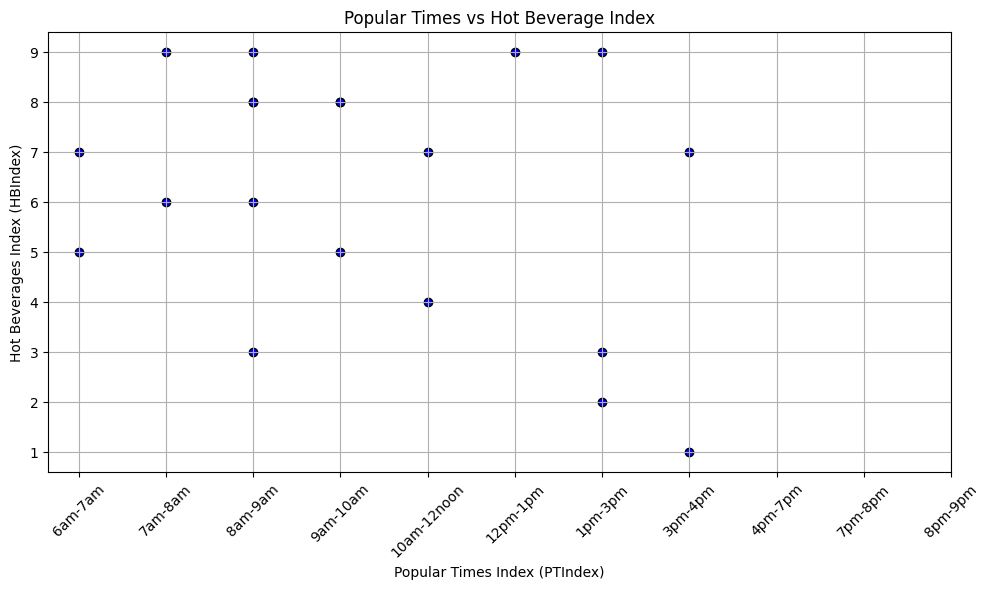

In [ ]:
import matplotlib.pyplot as plt

# Given data
data = {
    'PTIndex': [1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 3, 5, 7, 5, 4, 6, 7, 7, 8, 8],
    'HBIndex': [5, 7, 6, 9, 6, 8, 8, 9, 8, 8, 3, 4, 2, 7, 5, 9, 3, 9, 1, 7]
}

# Create a figure and set its size
plt.figure(figsize=(10, 6))

# Scatter plot with blue points, circle markers, and black edges
plt.scatter(data['PTIndex'], data['HBIndex'], c='blue', marker='o', edgecolors='black')

# Set the title and axis labels
plt.title('Popular Times vs Hot Beverage Index')
plt.xlabel('Popular Times Index (PTIndex)')
plt.ylabel('Hot Beverages Index (HBIndex)')

# Enable the grid
plt.grid(True)

# Customize the x-axis ticks and labels
x_labels = ["6am-7am", "7am-8am", "8am-9am", "9am-10am", "10am-12noon", "12pm-1pm", "1pm-3pm", "3pm-4pm", "4pm-7pm", "7pm-8pm", "8pm-9pm"]
plt.xticks(list(range(1, 12)), x_labels, rotation=45)

# Ensure a tight layout
plt.tight_layout()

# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

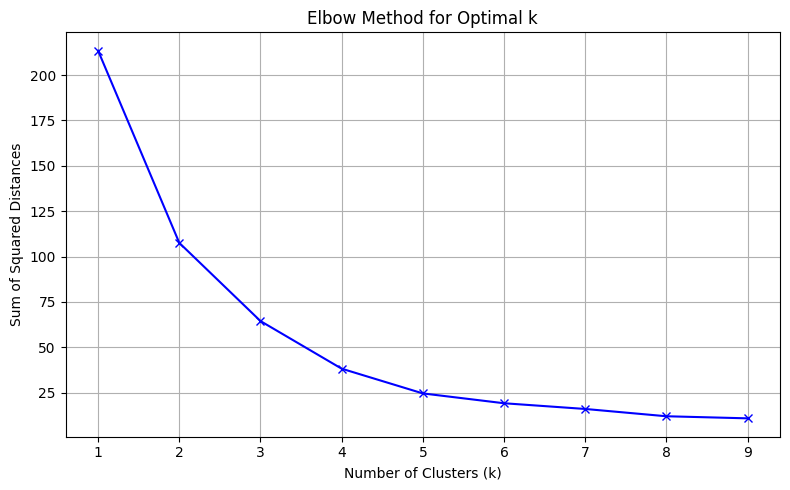

In [ ]:
from sklearn.cluster import KMeans

# Extracting the data points for clustering
X = list(zip(data['PTIndex'], data['HBIndex']))

# Initialize an empty list to store the sum of squared distances
ssd = []

# Define the range of values for k (number of clusters)
K = range(1, 10)

# Calculate the sum of squared distances for different values of k
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plotting the Elbow method to find the optimal value of k
plt.figure(figsize=(8, 5))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


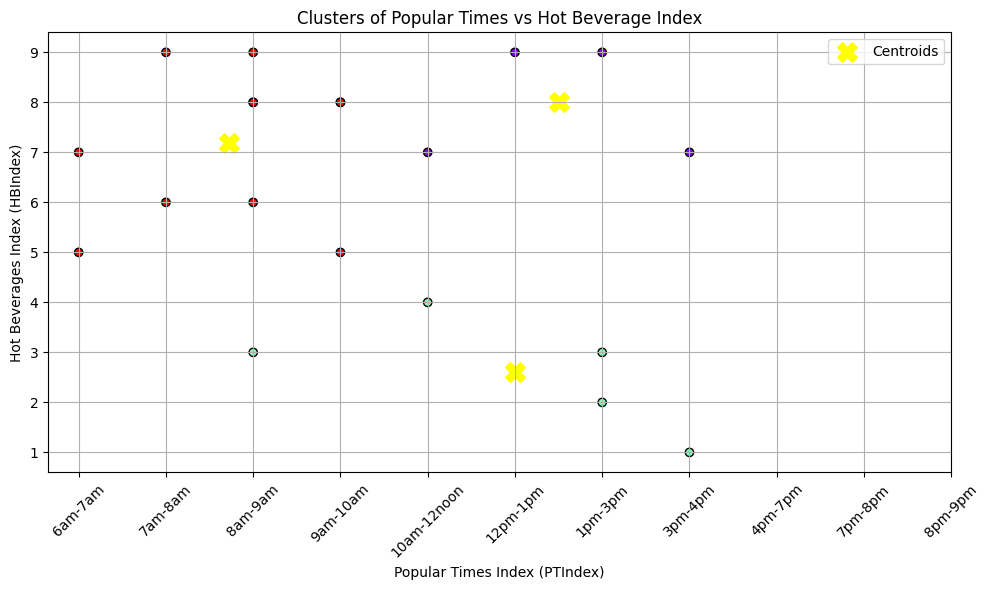

In [ ]:
# Applying KMeans with 3 clusters
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['PTIndex'], data['HBIndex'], c=clusters, cmap='rainbow', marker='o', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', marker='X', label='Centroids')
plt.title('Clusters of Popular Times vs Hot Beverage Index')
plt.xlabel('Popular Times Index (PTIndex)')
plt.ylabel('Hot Beverages Index (HBIndex)')
plt.grid(True)
plt.xticks(list(range(1, 12)),
           ["6am-7am", "7am-8am", "8am-9am", "9am-10am", "10am-12noon", "12pm-1pm", "1pm-3pm", "3pm-4pm", "4pm-7pm", "7pm-8pm", "8pm-9pm"],
           rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**Recommendations:**

Based on the cluster analysis, the manager can consider the following strategies:

**Morning Offers (Purple Cluster):**

Given the popularity of "Coffee Of the Day" and "Espresso Shot" during 8 am - 10 am, it is recommended to offer discounts or promotions on these beverages during these hours to attract more customers.

**Diverse Beverage Promotion (Teal Cluster):**

Since this cluster exhibits a diverse range of beverage choices, the manager should consider introducing combo offers or sampling of new beverages throughout the day to attract and retain these customers.

**Evening Specials (Red Cluster):**

Considering the preference for "Hot Chocolate" in the late afternoon and evening, it is advisable to create special evening offers or combos that include "Hot Chocolate" to boost sales during these hours.
The yellow 'X' markers in the plot represent the centroids of each cluster. These centroids can be used as representative points for each cluster, providing a summary of the typical behavior within that cluster.








# **Part B: Developing Hierarchical Clustering Method for Starbucks Hot Beverages Cluster**



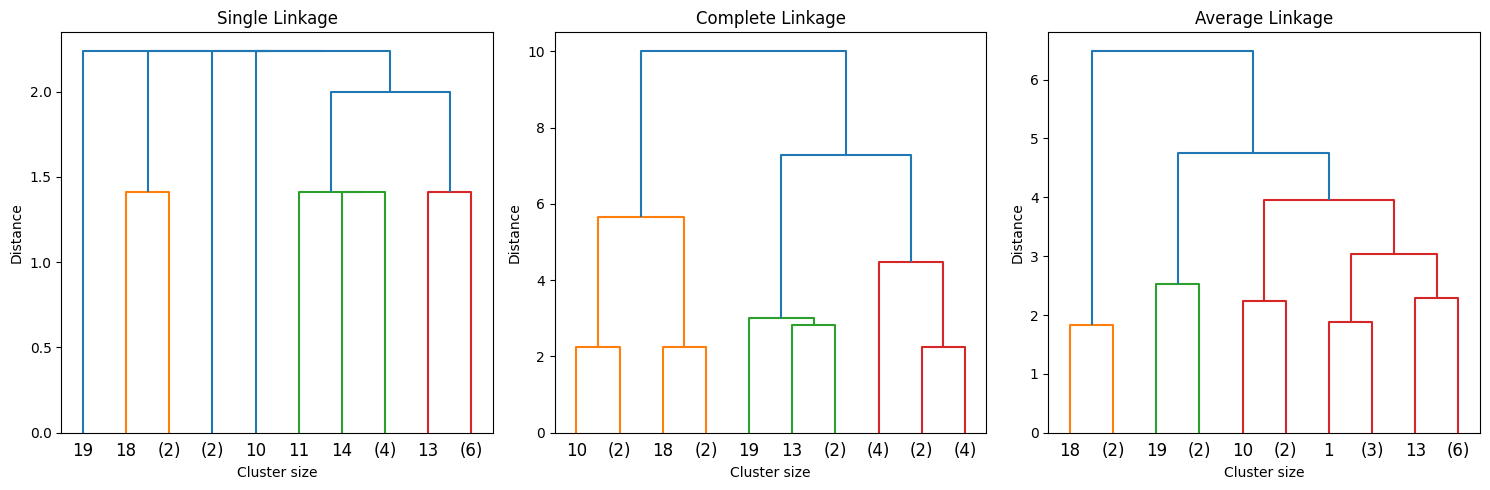

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram,cut_tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Define the linkage methods to explore
linkage_methods = ['single', 'complete', 'average']

# Create a subplot for each linkage method
plt.figure(figsize=(15, 5))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(1, 3, i)

    # Compute linkage matrix using the specified method
    Z = linkage(df, method=method)

    # Plot the dendrogram, truncating to show the last 10 clusters
    dendrogram(Z, truncate_mode='lastp', p=10)

    # Set plot title and axis labels
    plt.title(f'{method.capitalize()} Linkage')
    plt.xlabel('Cluster size')
    plt.ylabel('Distance')
    plt.tight_layout()

# Display the dendrograms for all linkage methods
plt.show()


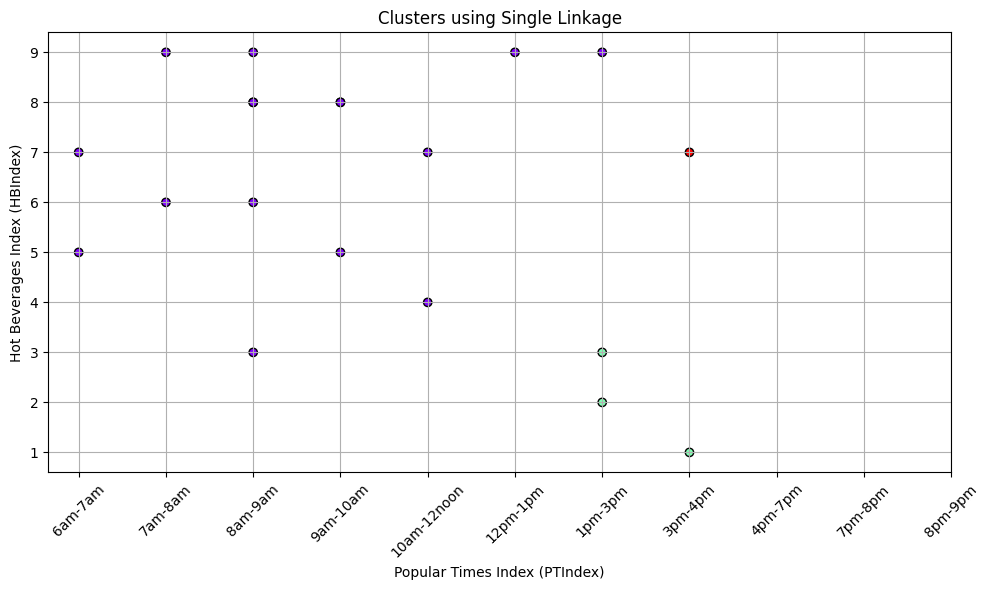

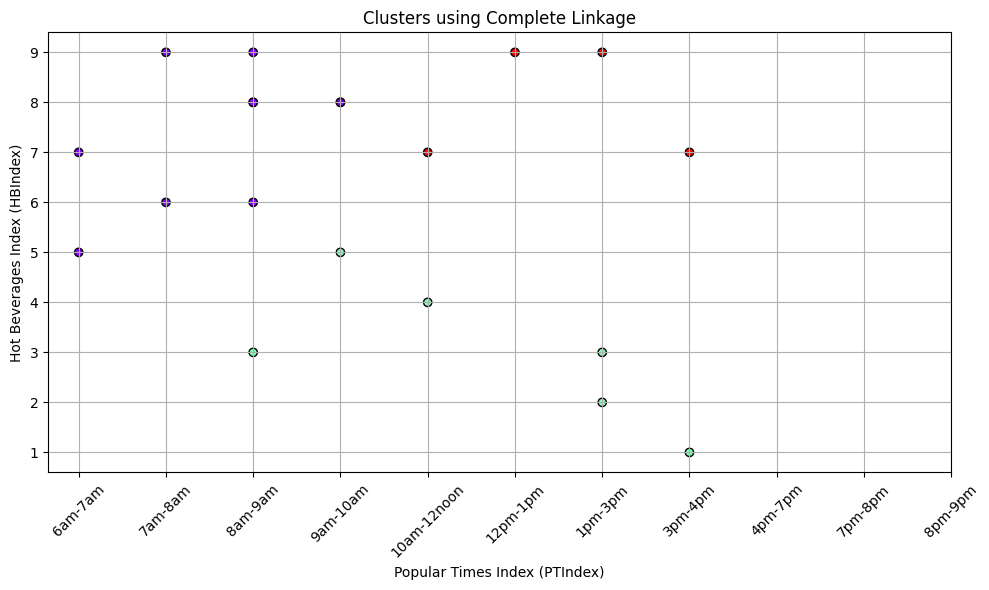

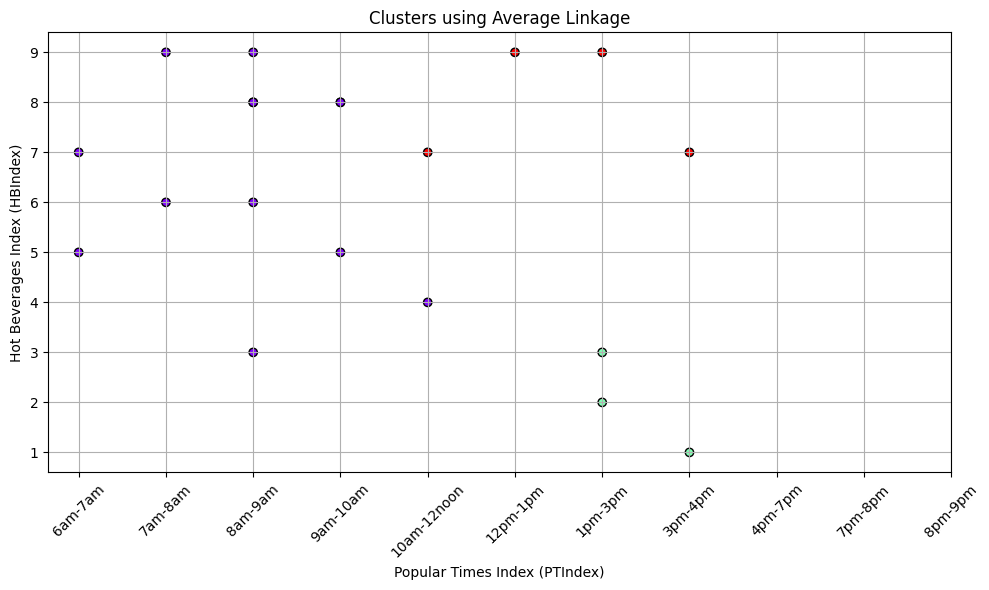

In [ ]:
# Function to apply hierarchical clustering and plot the results
def hierarchical_clustering(method):
    # Compute linkage matrix
    Z = linkage(df, method=method)

    # Cut the tree to get 3 clusters
    df[f'Cluster_{method}'] = cut_tree(Z, n_clusters=3).flatten()

    # Plotting the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(df['PTIndex'], df['HBIndex'], c=df[f'Cluster_{method}'], cmap='rainbow', marker='o', edgecolors='black')
    plt.title(f'Clusters using {method.capitalize()} Linkage')
    plt.xlabel('Popular Times Index (PTIndex)')
    plt.ylabel('Hot Beverages Index (HBIndex)')
    plt.grid(True)

    # Customize the x-axis ticks and labels
    plt.xticks(list(range(1, 12)),
               ["6am-7am", "7am-8am", "8am-9am", "9am-10am", "10am-12noon", "12pm-1pm", "1pm-3pm", "3pm-4pm", "4pm-7pm", "7pm-8pm", "8pm-9pm"],
               rotation=45)
    plt.tight_layout()
    plt.show()

# Apply hierarchical clustering for each linkage method and plot
for method in linkage_methods:
    hierarchical_clustering(method)


Here's a rewritten version of the last recommendations with improved clarity and structure:

# **Final Recommendations:**
### **1. Morning Coupons (Purple Cluster):** Offer a 10% discount on "Coffee Of the Day" or "Espresso Shot" between 8 am - 10 am to attract early morning customers.

### **2. All-Day Special (Teal Cluster):** Introduce a new beverage sampler with any purchase throughout the day to entice customers to try different beverages.

### **3. Evening Delight (Red Cluster):** Promote a "Buy one Hot Chocolate, get the second at 50% off" deal after 4 pm to enhance the evening experience for customers.
